# Let's map some earthquakes!

Use this notebook to complete your final project for unit 4. You'll create a dataframe for the data you downloaded and then plot the earthquakes using latitude and longitude. You'll also create functions to make your code more efficient.

Import the libraries you need here:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

This code adds an image behind your plot:

Create your data frame:

In [2]:
df = pd.read_csv("results.csv")
df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,9925,Tsu,1900,1.0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2567,NaN,1900,1.0,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0
2,2575,NaN,1900,7.0,29.0,6.0,59.0,NaN,33.0,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6232,Tsu,1900,9.0,10.0,21.0,30.0,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
4,6234,Tsu,1900,9.0,17.0,21.0,45.0,NaN,NaN,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Try plotting your earthquakes!
Hint: You will need to use the "LATITUDE" and "LONGITUDE" columns

You will also need xlim and ylim to focus the map on your region. Use the following limits:
- North America: xlim = (-180,-50), ylim = (0,90)
- Central America: xlim = (-100,-70), ylim = (0,25)
- South America: xlim = (-120,-20), ylim = (-60,20)
- Africa: xlim = (-25,50), ylim = (-40,45)
- Pacific: xlim = (80,180), ylim = (-70,30)

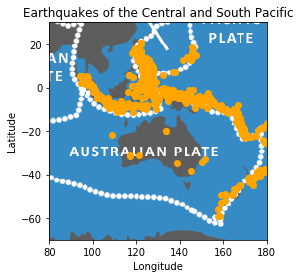

In [3]:
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
lat = df["LATITUDE"]
lon = df["LONGITUDE"]
plt.scatter(lon, lat, color = "orange")
plt.xlim(80, 180)
plt.ylim(-70, 30)
plt.title("Earthquakes of the Central and South Pacific")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

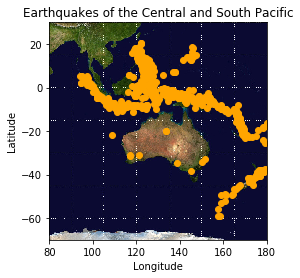

In [4]:
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
lat = df["LATITUDE"]
lon = df["LONGITUDE"]
plt.scatter(lon, lat, color = "orange")
plt.xlim(80, 180)
plt.ylim(-70, 30)
plt.title("Earthquakes of the Central and South Pacific")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

### Let's add some color (and functions)
Next, you'll need to color code your points based on one of the characteristics in the data frame. 

First, create a function that takes the name of a column and a number of colors and returns list of intermediate values based on the number of colors you specify (these values will be the boundaries for conditionals later on).

In [5]:
print(df["EQ_PRIMARY"].max())
print(df["EQ_PRIMARY"].min())
print(df["EQ_PRIMARY"].max()-df["EQ_PRIMARY"].min())

9.1
3.1
6.0


In [6]:
#function for boundaries of colors
def colorFunc(column, numColor):
    empty_list = []
    interval = (column.max()- column.min())/numColor
    num_temp = column.min()
    while len(empty_list) < numColor:
        num_temp += interval
        empty_list.append(num_temp)
    return empty_list

colorFunc(df["EQ_PRIMARY"], 10)

[3.7000000000000002,
 4.2999999999999998,
 4.8999999999999995,
 5.4999999999999991,
 6.0999999999999988,
 6.6999999999999984,
 7.299999999999998,
 7.8999999999999977,
 8.4999999999999982,
 9.0999999999999979]

Next, you will make your own version of the colormap we used to color the stars in the astrophysics unit. You will need to make a list that contains a color for each value of the characteristic you have chosen. Think back to the climate change unit for ideas...

You should create a function that takes the name of your characteristic column and a list of RGB value lists and creates a list of values for the "colormap".

Hint: You will need to use the last function you created. You can call this function inside of your new function.

In [7]:
#color for-loops
mag = df["EQ_PRIMARY"]
def Func(column):
    empty_list = colorFunc(df["EQ_PRIMARY"], 10)
    colors = []
    for item in column:
        if item <= empty_list[0]:
            colors.append([255/255, 255/255, 255/255])
        elif item <= empty_list[1]:
            colors.append([234/255, 209/255, 206/255])
        elif item <= empty_list[2]:
            colors.append([249/255, 207/255, 202/255])
        elif item <= empty_list[3]:
            colors.append([226/255, 169/255, 161/255])
        elif item <= empty_list[4]:
            colors.append([239/255, 158/255, 146/255])
        elif item <= empty_list[5]:
            colors.append([232/255, 123/255, 106/255])
        elif item <= empty_list[6]:
            colors.append([237/255, 97/255, 75/255])
        elif item <= empty_list[7]:
            colors.append([239/255, 62/255, 35/255])
        elif item <= empty_list[8]:
            colors.append([204/255, 39/255, 14/255])
        elif item <= empty_list[9]:
            colors.append([150/255, 20/255, 0/255])
    return colors
            
colormap = Func(mag)

Next, plot your graph again, adding the argument c = your "colormap" to the scatterplot function:

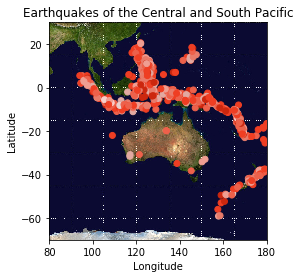

In [8]:
# You will need to run this code again first
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(lon, lat, c = colormap)
plt.xlim(80, 180)
plt.ylim(-70, 30)
plt.title("Earthquakes of the Central and South Pacific")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

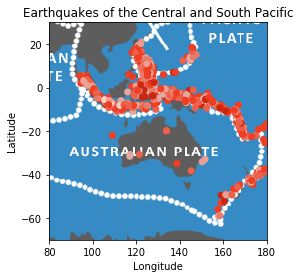

In [9]:
#plates image
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

#scatter plot
plt.scatter(lon, lat, c = colormap)
plt.xlim(80, 180)
plt.ylim(-70, 30)
plt.title("Earthquakes of the Central and South Pacific")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

### Challenge: 
Change the size of your markers based on a second characteristic

In [10]:
#function for boundaries of sizes
def sizeFunc(column, numSize):
    empty_list = []
    interval = (column.max()- column.min())/numSize
    num_temp = column.min()
    while len(empty_list) < numSize:
        num_temp += interval
        empty_list.append(num_temp)
    return empty_list

sizeFunc(df["DEATHS"], 5)

[1200.8, 2400.5999999999999, 3600.3999999999996, 4800.1999999999998, 6000.0]

In [11]:
#size for-loops
death = df["DEATHS"]
def Func(column):
    empty_list = sizeFunc(df["DEATHS"], 5)
    sizes = []
    for item in column:
        if item <= empty_list[0]:
            sizes.append(10)
        elif item <= empty_list[1]:
            sizes.append(50)
        elif item <= empty_list[2]:
            sizes.append(100)
        elif item <= empty_list[3]:
            sizes.append(150)
        elif item <= empty_list[4]:
            sizes.append(200)
    return sizes
            
size_death = Func(death)

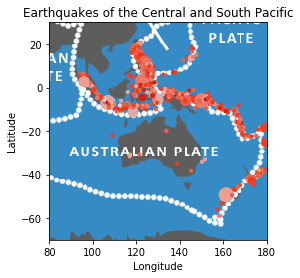

In [12]:
#plates image
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

#scatter plot
plt.scatter(lon, lat, c = colormap, s = size_death)
plt.xlim(80, 180)
plt.ylim(-70, 30)
plt.title("Earthquakes of the Central and South Pacific")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("Earthquakes of the Central and South Pacific")
plt.show()